# 👻 Ghost on Local
---
[![Phantom](https://img.shields.io/badge/Version-2.0-teal.svg)]()
[![Phantom](https://img.shields.io/badge/Github-👻-black.svg)](https://github.com/Ming-doan/timeseries-imputation.git)

In [1]:
import pandas as pd
from modules.alias import get_by_aliases
from modules.utils.preprocessing import Preprocessing
from modules.utils.missing import CreateMissingDataFrame
from modules.train import Trainer
from modules.models import *
from modules.utils.callbacks import SavePlot, Combined
from modules.utils.generator import WindowGenerator
from modules.utils.cache import Cache

In [2]:
# Datasets
DATASET = 'PhuLien'
SELECTED_COLUMNS = ['WaterLevel']
# Missing values
MISSING_PERCENTAGE = 13
MISSING_GAPS = 1
SEED = 42
MODE = 'Random' # 'Random', 'Linear'
# Models
WINDOW_SIZE = 12
BATCH_SIZE = 1
MODELS = get_by_aliases(['cnn1d', 'cnnlstm'])

### Preprocessing

In [3]:
import os
if not os.path.exists('results'):
    os.makedirs('results')

In [4]:
# Read CSV
df = pd.read_csv(f'{DATASET}.csv')
df = df[SELECTED_COLUMNS]

In [5]:
# Preprocessing data
preprocessing = Preprocessing()
df = preprocessing.flow(df)

In [6]:
# Create missing data
creator = CreateMissingDataFrame(df, MISSING_PERCENTAGE, MISSING_GAPS, split_mode=MODE, seed=SEED, is_constant_missing=True)

2023-10-31 17:09:54.369 | SUCCESS  | modules.utils.missing:__dropping_dataframe:156 - Dropped dataframe successfully. Missing indexs: [(102, 115)]


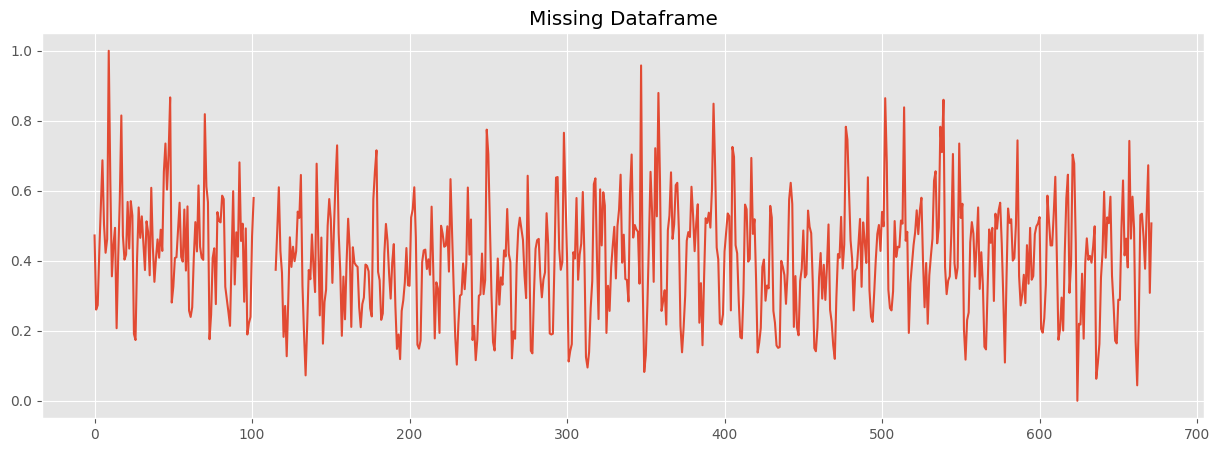

In [7]:
creator.plot(save_path='results/missing_data.png')

### Training

2023-10-31 17:09:54.659 | WARNING  | modules.train:train:69 - Window size is larger than the dataframe size. 12 >= 12. Disabling prediction.
2023-10-31 17:09:54.661 | INFO     | modules.train:train:84 - Model 1/2: CNN1D
2023-10-31 17:09:54.662 | INFO     | modules.train:train:89 - Fitting the model CNN1D


CNN1D model summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (1, 10, 64)               256       
                                                                 
 conv1d_1 (Conv1D)           (1, 6, 64)                20544     
                                                                 
 flatten (Flatten)           (1, 384)                  0         
                                                                 
 dense (Dense)               (1, 1)                    385       
                                                                 
Total params: 21185 (82.75 KB)
Trainable params: 21185 (82.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
90/90 [==============================] - 1s 2ms/step - loss: 0.0315
Epoch 2/200
90/90 [==============================] 

2023-10-31 17:09:57.224 | INFO     | modules.train:train:115 - Training completed in 2.56s
Forecasting: 100%|██████████| 13/13 [00:00<00:00, 17.96it/s]
2023-10-31 17:09:57.951 | INFO     | modules.train:train:165 - Similarity on forecasting: 0.9071037468512


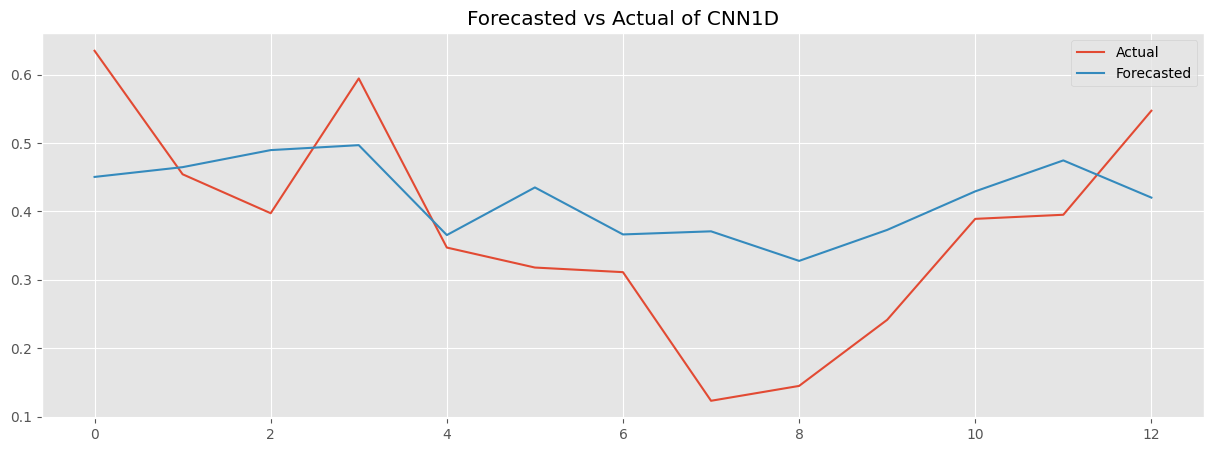

2023-10-31 17:09:58.187 | SUCCESS  | modules.train:train:173 - Model 1/2~CNN1D completed.
2023-10-31 17:09:58.188 | INFO     | modules.train:train:84 - Model 2/2: CNNLSTM
2023-10-31 17:09:58.189 | INFO     | modules.train:train:89 - Fitting the model CNNLSTM


CNNLSTM model summary:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (1, 10, 64)               256       
                                                                 
 conv1d_3 (Conv1D)           (1, 6, 64)                20544     
                                                                 
 time_distributed (TimeDist  (1, 6, 64)                0         
 ributed)                                                        
                                                                 
 lstm (LSTM)                 (1, 64)                   33024     
                                                                 
 dense_1 (Dense)             (1, 1)                    65        
                                                                 
Total params: 53889 (210.50 KB)
Trainable params: 53889 (210.50 KB)
Non-trainable params: 0 (0.00

2023-10-31 17:10:03.811 | INFO     | modules.train:train:115 - Training completed in 5.62s
Forecasting: 100%|██████████| 13/13 [00:00<00:00, 16.41it/s]
2023-10-31 17:10:04.606 | INFO     | modules.train:train:165 - Similarity on forecasting: 0.9011898830144335


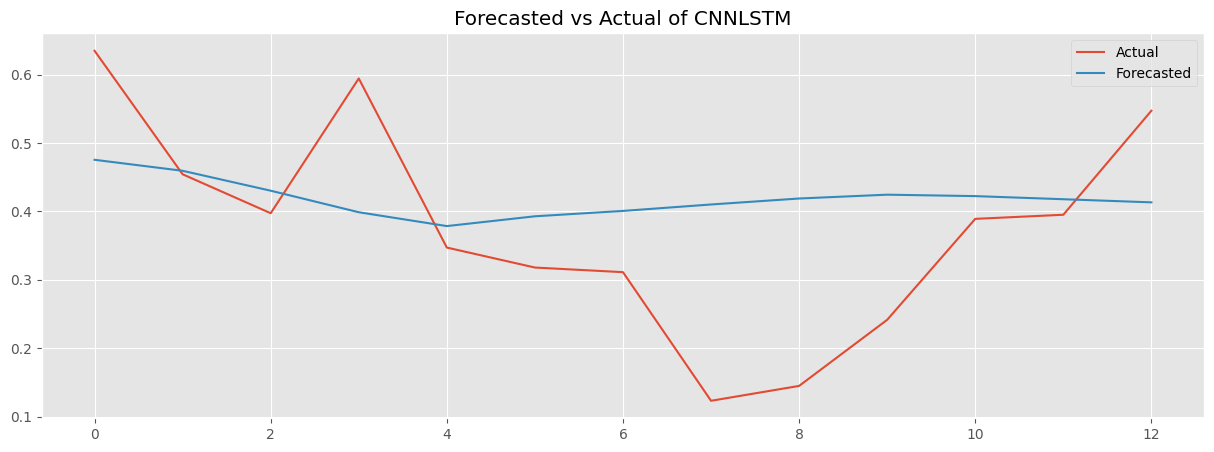

2023-10-31 17:10:04.837 | SUCCESS  | modules.train:train:173 - Model 2/2~CNNLSTM completed.
2023-10-31 17:10:04.838 | INFO     | modules.train:reset:41 - All models have been reset.
2023-10-31 17:10:04.838 | WARNING  | modules.train:train:69 - Window size is larger than the dataframe size. 12 >= 12. Disabling prediction.
2023-10-31 17:10:04.839 | INFO     | modules.train:train:84 - Model 1/2: CNN1D
2023-10-31 17:10:04.839 | INFO     | modules.train:train:89 - Fitting the model CNN1D


CNN1D model summary:
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (1, 10, 64)               256       
                                                                 
 conv1d_1 (Conv1D)           (1, 6, 64)                20544     
                                                                 
 flatten (Flatten)           (1, 384)                  0         
                                                                 
 dense (Dense)               (1, 1)                    385       
                                                                 
Total params: 21185 (82.75 KB)
Trainable params: 21185 (82.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
545/545 [==============================] - 1s 2ms/step - loss: 0.0172
Epoch 2/200
545/545 [==========================

2023-10-31 17:10:47.372 | INFO     | modules.train:train:115 - Training completed in 42.53s
Forecasting: 100%|██████████| 13/13 [00:00<00:00, 15.51it/s]
2023-10-31 17:10:48.213 | INFO     | modules.train:train:165 - Similarity on forecasting: 0.9077364972031686


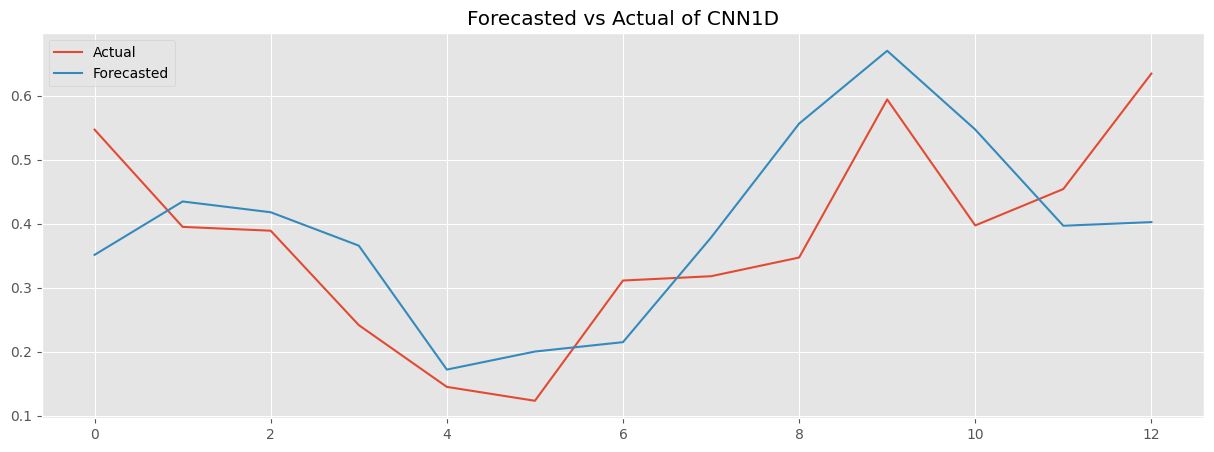

2023-10-31 17:10:48.480 | SUCCESS  | modules.train:train:173 - Model 1/2~CNN1D completed.
2023-10-31 17:10:48.480 | INFO     | modules.train:train:84 - Model 2/2: CNNLSTM
2023-10-31 17:10:48.481 | INFO     | modules.train:train:89 - Fitting the model CNNLSTM


CNNLSTM model summary:
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (1, 10, 64)               256       
                                                                 
 conv1d_3 (Conv1D)           (1, 6, 64)                20544     
                                                                 
 time_distributed (TimeDist  (1, 6, 64)                0         
 ributed)                                                        
                                                                 
 lstm (LSTM)                 (1, 64)                   33024     
                                                                 
 dense_1 (Dense)             (1, 1)                    65        
                                                                 
Total params: 53889 (210.50 KB)
Trainable params: 53889 (210.50 KB)
Non-trainable params: 0 (0.00

2023-10-31 17:11:03.066 | INFO     | modules.train:train:115 - Training completed in 14.58s
Forecasting: 100%|██████████| 13/13 [00:00<00:00, 16.12it/s]
2023-10-31 17:11:03.875 | INFO     | modules.train:train:165 - Similarity on forecasting: 0.9272924437572777


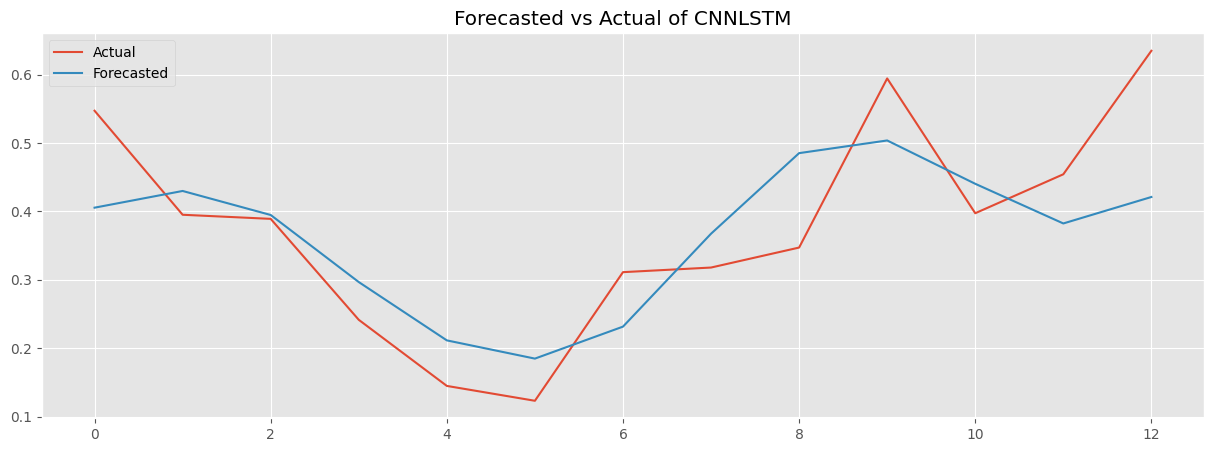

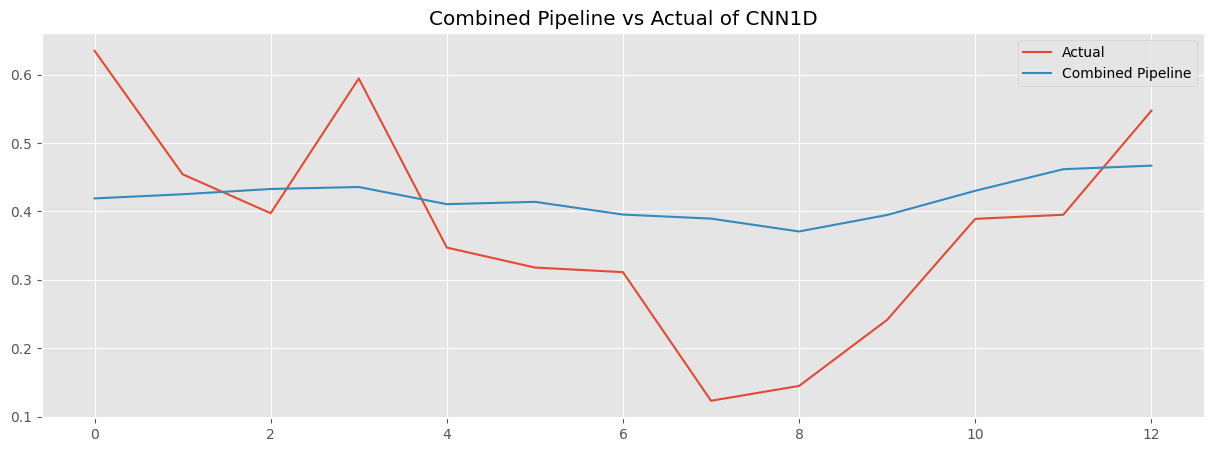

2023-10-31 17:11:04.355 | INFO     | modules.utils.callbacks:after_forecast:231 - Similarity on combining of model CNN1D: 0.8996452674785578


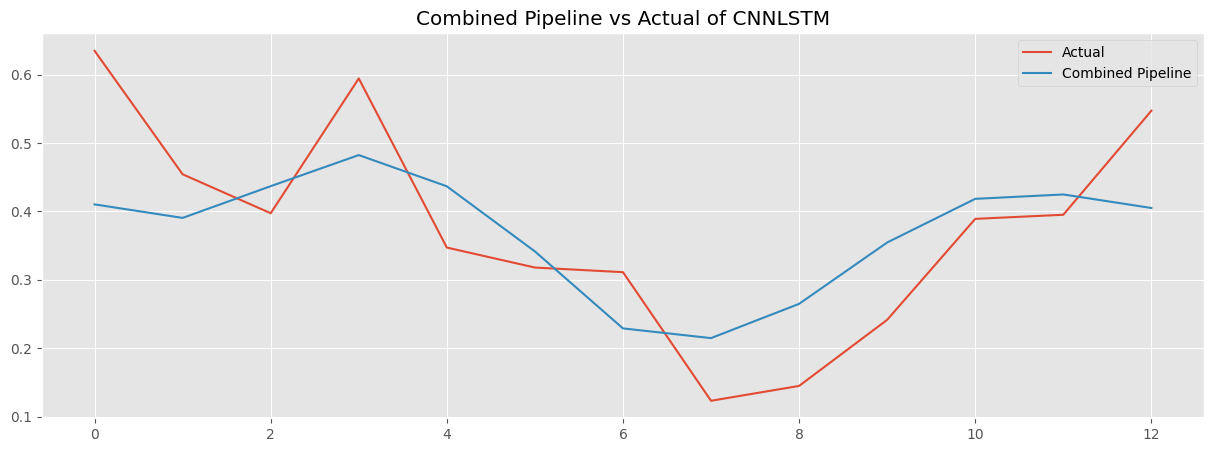

2023-10-31 17:11:04.617 | INFO     | modules.utils.callbacks:after_forecast:231 - Similarity on combining of model CNNLSTM: 0.9202402478270716
2023-10-31 17:11:04.618 | SUCCESS  | modules.train:train:173 - Model 2/2~CNNLSTM completed.
2023-10-31 17:11:04.619 | INFO     | modules.train:reset:41 - All models have been reset.


In [8]:
# Training
trainer = Trainer(model=MODELS)
combined_callback = Combined(n_models=len(MODELS), combination_mode='data_per', df=creator, save_directory="results")
sp = SavePlot(n_models=len(MODELS), save_directory="results")
cache = Cache(live_cache=True)

for train_df, test_df in creator:
    train_gen = WindowGenerator(train_df, WINDOW_SIZE, BATCH_SIZE)
    test_gen = WindowGenerator(test_df, WINDOW_SIZE, BATCH_SIZE)

    trainer.train(train_gen, test_gen, callbacks=[sp, combined_callback], cache=cache)
    trainer.reset()

In [9]:
combined_callback.metrics.metrics.to_csv('results/metrics.csv', index=False)
combined_callback.metrics.metrics

,Model,Similarity,NMAE,RMSE,R2,FSD,FB,FA2
0,CNN1D,0.899645,0.116524,0.139155,0.720647,1.399695,0.105849,0.846154
1,CNNLSTM,0.920240,0.089233,0.104225,0.753386,0.596092,-0.018203,1.000000


In [10]:
for model in MODELS:
    print(f'{model.name}: {model.get_params()}')

CNN1D: {'conv1d': {'name': 'conv1d', 'trainable': True, 'dtype': 'float32', 'filters': 64, 'kernel_size': (3,), 'strides': (1,), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1,), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'conv1d_1': {'name': 'conv1d_1', 'trainable': True, 'dtype': 'float32', 'filters': 64, 'kernel_size': (5,), 'strides': (1,), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1,), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'s

In [11]:
# Plot history
import matplotlib.pyplot as plt
for model in MODELS:
    if 'histories' in dir(model):
        try:
            fig, ax = plt.subplots(1, 2, figsize=(15, 5))
            ax[0].plot(model.histories[0].history['loss'], label='Pipeline')
            ax[0].legend()
            ax[1].plot(model.histories[1].history['loss'], label='Reverse Pipeline')
            ax[1].legend()
            fig.suptitle(f'Loss of {model.name}')
            plt.tight_layout()
        except Exception as e:
            print(e)
            print('\033[91mCannot plot history of model', model.name)